<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/05_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

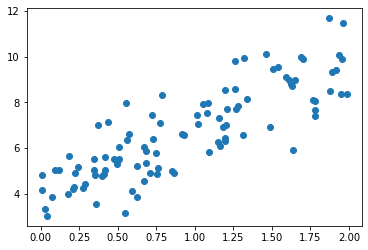

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed=100)

N=100
X = 2 * np.random.rand(N,1)
y = 4+3*X + np.random.randn(N,1)

plt.scatter(X,y)

# Implementar la solución via la ecuación normal

In [ ]:
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

Math(r'\beta = ({\bf X}^T {\bf X})^{-1}{\bf X}^T {\bf y}')

<IPython.core.display.Math object>

# Implementar la solución via la Pseudo inversa de Moore-Penrose
 Usada en scikit-learn

In [ ]:
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

Math(r'\beta = ({\bf X})^{+}{\bf y}')

<IPython.core.display.Math object>

# Implementar via Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X,y)
lm.intercept_, lm.coef_

print("los parametros beta : {}".format([lm.intercept_, lm.coef_]))

los parametros beta : [array([3.98485975]), array([[2.86232606]])]


# Implementar el algoritmo de gradiente descendente tipo batch

# implementar el gradiente descendete estocástico

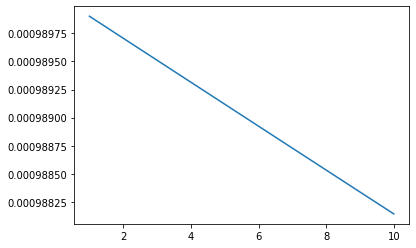

In [ ]:
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

y_val = [ learning_schedule(50*100+i)  for i in [1,2,3,4,5,6,7,8,9,10]]
plt.plot([1,2,3,4,5,6,7,8,9,10], y_val)
plt.show()

los parametros beta : [[3.99153206]
 [2.84477637]]


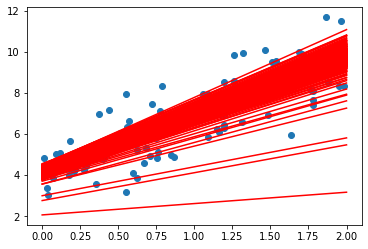

In [ ]:
X_b = np.matrix(np.c_[np.ones((100,1)),X])

n_epochs = 100
N = 100
η =0.02

#variar el parametro η
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

β = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(N):
    random_index = np.random.randint(N)
    x_i = X_b[random_index:random_index+1]
    y_i = y[random_index:random_index+1]

    gradients = 2 * x_i.T @ (x_i @ β - y_i)
    η = learning_schedule(epoch*N+i)
    β = β - η *gradients

    plt.plot(X_new, X_new_b @ β ,"r-")

plt.scatter(X,y)

print("los parametros beta : {}".format(β))


# Gradiente descendente minibatch

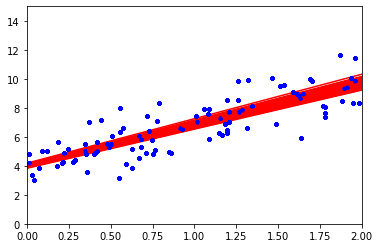

los parametros beta : [[4.00371117]
 [2.88698684]]


In [ ]:
n_epochs = 500

beta = np.random.randn(2,1)  # random initialization

minibatch_size = 20


t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epochs):

    shuffled_indices = np.random.permutation(N)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, N, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        gradients = 2/minibatch_size * xi.T @ (xi @ β - yi)
        η = learning_schedule(t)
        β = β - η * gradients


    plt.plot(X_new, X_new_b @ β, "r-")
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])

plt.show()

print("los parametros beta : {}".format(β))

#[([3.98485975]), ([[2.86232606]])]  <- exacto
#[[3.24735138]  [3.5154907 ]]  <- SGD batch
#[[3.98762243]  [2.8416635 ]]  <- SGD stochastic
# [[3.95948276] [2.83237427]]  <- SGD minibatch

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X,y)
sgd.intercept_, sgd.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.65238118]), array([3.15774507]))

# Regresion Polinomial

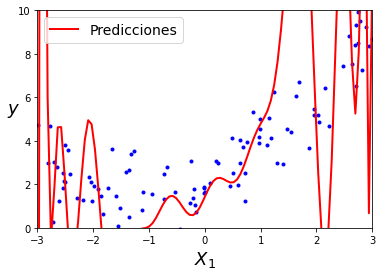

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# datos
N=100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)


# Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_features = PolynomialFeatures(degree=25, include_bias=True)
X_poly = poly_features.fit_transform(X)

lin_reg= LinearRegression()
lin_reg.fit(X_poly,y)


X_new=np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel(r"$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# feature space: tiene mayor dimensión que el espacio de los datos

## regresión polinomial con pipelines

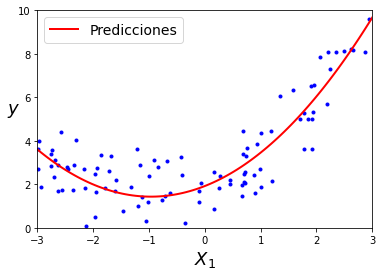

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# datos
N=100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

#---------------------------
pipeline = Pipeline(
        [   ("scaler", StandardScaler()),
            ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("linear_regression", LinearRegression()),
        ]
    )

# sugerencias:
# - usar siempre el Pipeline de sklearn
# - siempre escalar los datos
# - usar regularización
# - realizar selección de modelo para optimizar hyperparámetros (grid-search & cv, random-search &cv, bayesiann optimization)

pipeline.fit(X, y)
#---------------------------

X_new=np.linspace(-3, 3, 100).reshape(-1, 1)
y_new = pipeline.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel(r"$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


ejercicio, variar el grado del polinomio

# Ridge regression

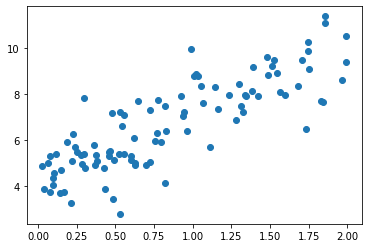

In [ ]:
N=100
X = 2 * np.random.rand(N,1)
y = 4+3*X + np.random.randn(N,1)

plt.scatter(X,y)


la prediccion es [[6.60322125]
 [6.78046069]]
la prediccion es [[4.28137241]
 [9.92685194]]


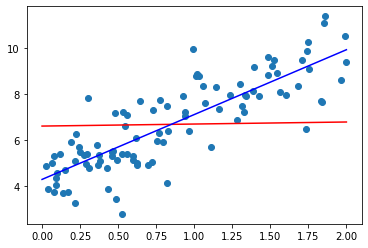

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1000, solver="cholesky")
ridge_reg.fit(X,y)

lm=LinearRegression()
lm.fit(X,y)

X_new = np.array([[0],[2]])

y_pred_ridge=ridge_reg.predict(X_new)
y_pred_lm=lm.predict(X_new)
print("la prediccion es {}".format(y_pred_ridge))
print("la prediccion es {}".format(y_pred_lm))


############
# PREDICCION
############
plt.plot(X_new, y_pred_ridge ,"r-")
plt.plot(X_new, y_pred_lm ,"b-")

plt.scatter(X,y)


Ejercicio: variar el parámetro de regularización

## Ridge regressión con Gradiente descendiente estocástico

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=100)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([6.63712498])

ejercicio: implementar ridge regresion con:

* polynomial features,
* pipeline y,
* gradiente descendiente estocástico



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#---------------------------
pipeline = Pipeline(
        [   ("scaler", StandardScaler()),
            ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
            ("Ridge_regression_sgd", SGDRegressor(penalty="l2", alpha=100)),
        ]
    )

pipeline.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('Ridge_regression_sgd', SGDRegressor(alpha=100))])

# LASSO
Ejercicio
* implementar LASSO hint `from sklearn.linear_model import Lasso`
* modificar el parámetro de regularización
* implementar LASSO con SGD

la prediccion es [6.67847822 6.67847822]
la prediccion es [[4.28137241]
 [9.92685194]]


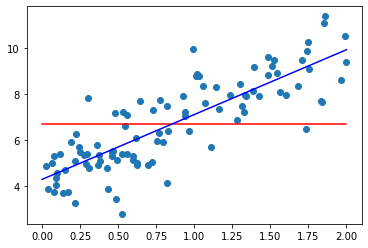

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X,y)

lm=LinearRegression()
lm.fit(X,y)

X_new = np.array([[0],[2]])

y_pred_lasso=lasso_reg.predict(X_new)
y_pred_lm=lm.predict(X_new)
print("la prediccion es {}".format(y_pred_lasso))
print("la prediccion es {}".format(y_pred_lm))


############
# PREDICCION
############
plt.plot(X_new, y_pred_lasso ,"r-")
plt.plot(X_new, y_pred_lm ,"b-")

plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=100)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([6.64318922])

# Elastic net
Ejercicio
* implementar Elastic net hint `from sklearn.linear_model import ElasticNet`
* modificar el parámetro de regularización
* implementar con SGD y características polinomiales usando Pipelines, mudar los parámetros alpha y ratio

# Early stopping


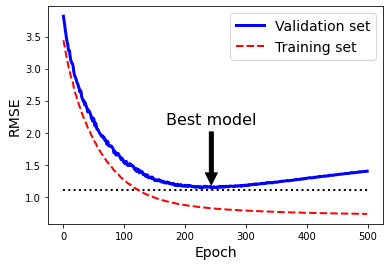

In [ ]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#datos
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
train_errors, val_errors = [], []
for epoch in range(500):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict) # for rollback
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    #rollbabck
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

best_model
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])



plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Support Vector Machines

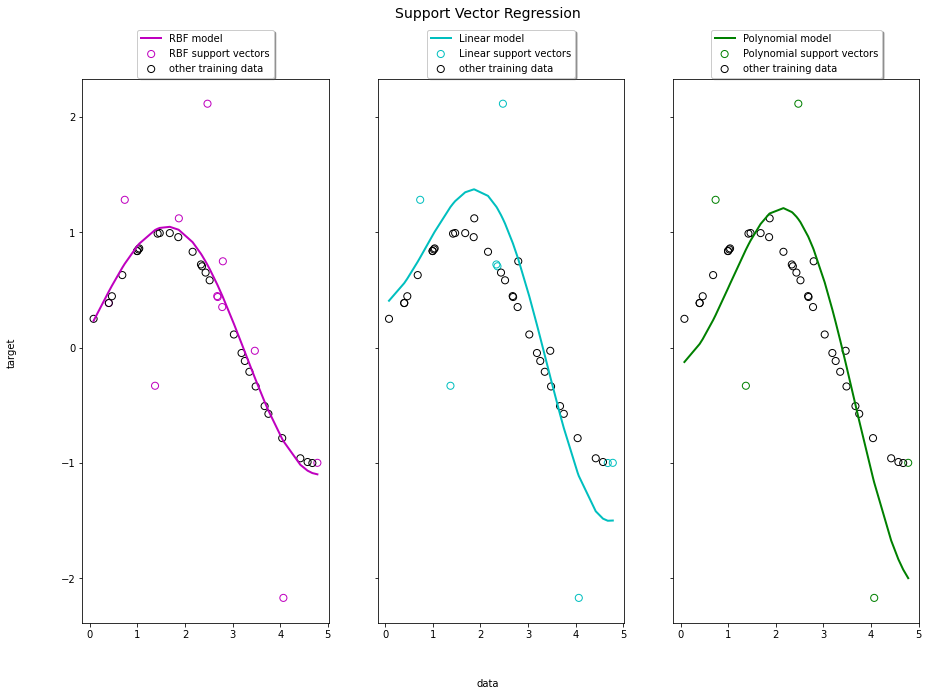

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()